In [8]:
# Downloading packages:

# Standard data science imports

import numpy as np
import pandas as pd
from pandas import DataFrame


# Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages

import pylab
import statsmodels.api as sm
import statistics
from scipy import stats

# Import chisquare 

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# File import

df=pd.read_csv('medical_clean.csv', index_col='CaseOrder')



In [9]:
#Reviewing Variables

print(df)

          Customer_id                           Interaction  \
CaseOrder                                                     
1             C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
2             Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
3             F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
4             A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
5             C544523  5885f56b-d6da-43a3-8760-83583af94266   
...               ...                                   ...   
9996          B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9997          P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9998          R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9999          E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
10000         I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                        UID          City State        County  \
CaseOrder                                                                       
1          3a83ddb

In [10]:
#Rename Variables

df.rename (columns = {
'Item1':'TimelyResponse',
'Item2':'TimelyFixes',
'Item3':'TimelyReplacements',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'RespectfulResponse',
'Item7':'Courteous',
'Item8':'Listening'},
inplace=True)           

In [11]:
print(df)

          Customer_id                           Interaction  \
CaseOrder                                                     
1             C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
2             Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
3             F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
4             A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
5             C544523  5885f56b-d6da-43a3-8760-83583af94266   
...               ...                                   ...   
9996          B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9997          P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9998          R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9999          E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
10000         I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                        UID          City State        County  \
CaseOrder                                                                       
1          3a83ddb

In [12]:
#Contigency Table
contigency = pd.crosstab(df['ReAdmis'], df['Listening'],
normalize='index')
contigency

Listening,1,2,3,4,5,6,7
ReAdmis,,,,,,,
No,0.020534,0.136313,0.340231,0.333123,0.143737,0.024483,0.001580
Yes,0.021532,0.143908,0.339875,0.334696,0.141455,0.017989,0.000545


In [13]:
c,p, dof, expected = chi2_contingency(contigency) 
print('p-value = ' + str(p))

p-value = 0.9999999998887438


<Axes: xlabel='Listening', ylabel='ReAdmis'>

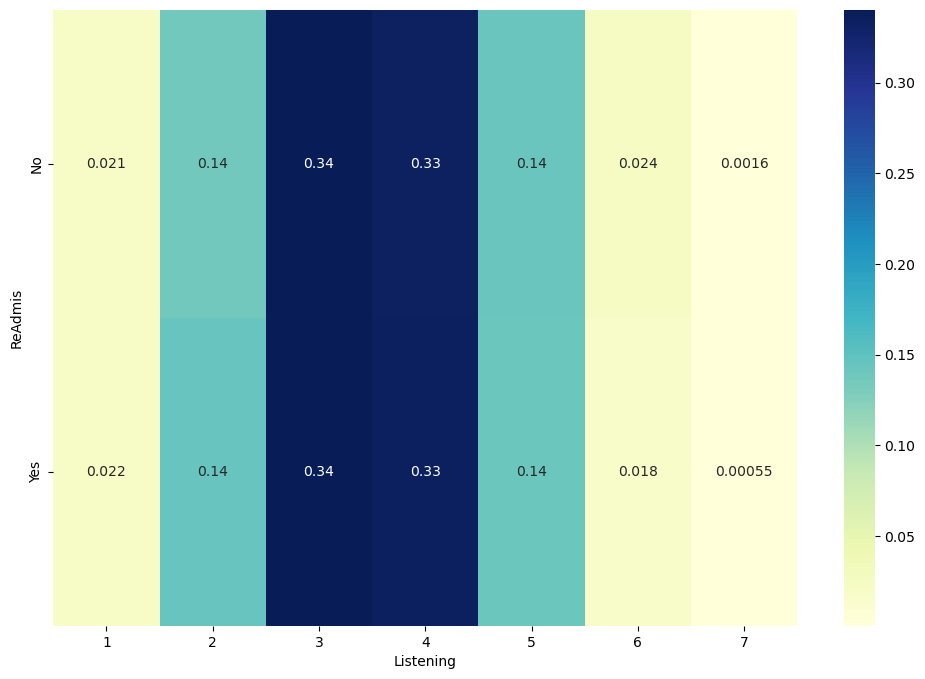

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [15]:
df_stats = df.describe()

In [16]:
print(df_stats)

                Zip           Lat           Lng     Population      Children  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean   50159.323900     38.751099    -91.243080    9965.253800      2.097200   
std    27469.588208      5.403085     15.205998   14824.758614      2.163659   
min      610.000000     17.967190   -174.209700       0.000000      0.000000   
25%    27592.000000     35.255120    -97.352982     694.750000      0.000000   
50%    50207.000000     39.419355    -88.397230    2769.000000      1.000000   
75%    72411.750000     42.044175    -80.438050   13945.000000      3.000000   
max    99929.000000     70.560990    -65.290170  122814.000000     10.000000   

                Age         Income   VitD_levels    Doc_visits  \
count  10000.000000   10000.000000  10000.000000  10000.000000   
mean      53.511700   40490.495160     17.964262      5.012200   
std       20.638538   28521.153293      2.017231      1.045734   
min       18.00

In [17]:
#https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# Import label encoder 
from sklearn import preprocessing 

 
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
    

In [18]:
# Encode labels in column. 

df['ReAdmis'].unique() 

array(['No', 'Yes'], dtype=object)

In [19]:
df_num ={"ReAdmis_numeric":{"No":0, "Yes": 1, "nan":np.NAN}}

In [20]:
df['ReAdmis_numeric'] = df['ReAdmis']

In [21]:
df.replace(df_num, inplace=True)

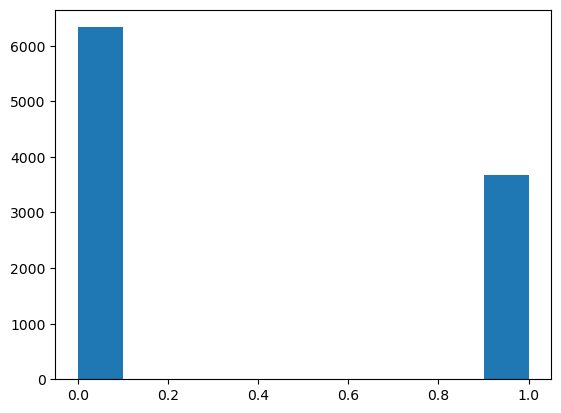

In [22]:
plt.hist(df['ReAdmis_numeric'])
plt.show()

In [23]:
df['HighBlood'].unique() 

array(['Yes', 'No'], dtype=object)

In [24]:
df['HighBlood_numeric'] = df['HighBlood']

In [25]:
df_num ={"HighBlood_numeric":{"No":0, "Yes": 1, "nan":np.NAN}}

In [26]:
df.replace(df_num, inplace=True)

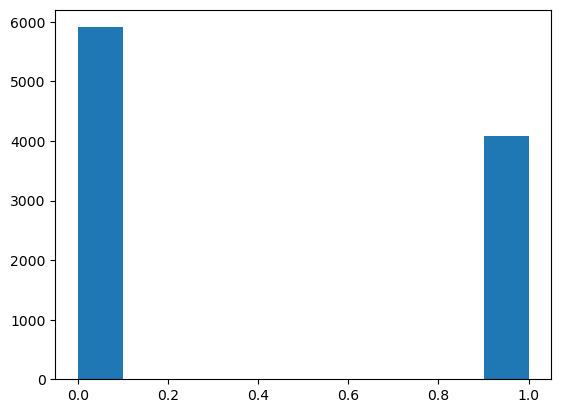

In [27]:
plt.hist(df['HighBlood_numeric'])
plt.show()

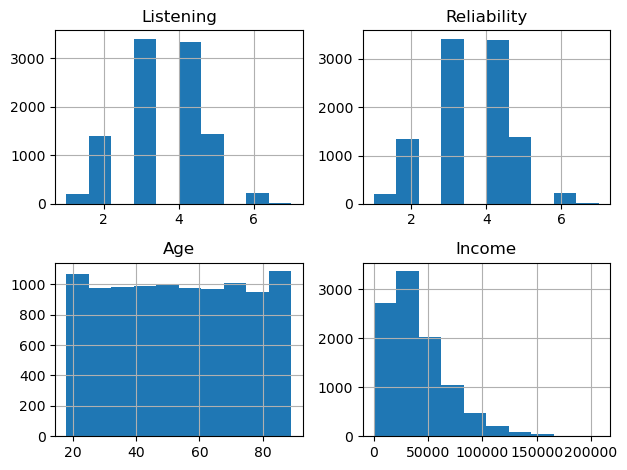

In [28]:
df[['Listening', 'Reliability','Age','Income']].hist()
plt.savefig('df_pyplot.jpg')
plt.tight_layout()

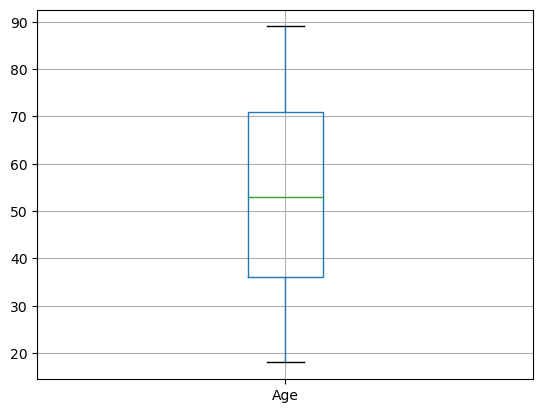

In [29]:
df.boxplot(['Age'])
plt.savefig('df_boxplots.jpg')

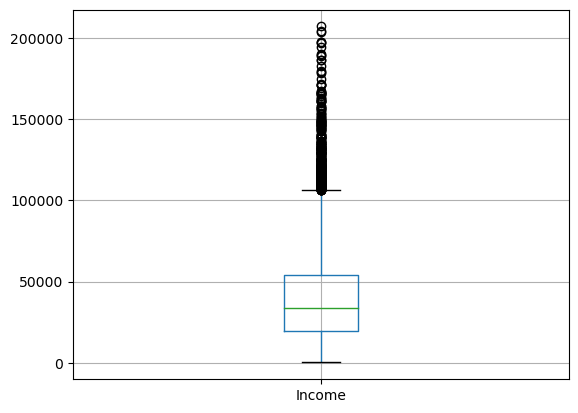

In [30]:
df.boxplot(['Income'])
plt.savefig('df_boxplots.jpg')

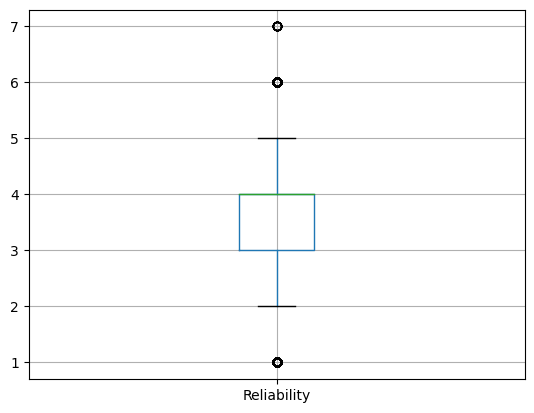

In [31]:
df.boxplot(['Reliability'])
plt.savefig('df_boxplots.jpg')

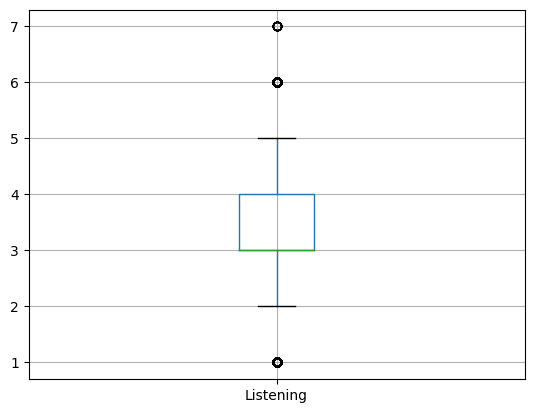

In [32]:
df.boxplot(['Listening'])
plt.savefig('df_boxplots.jpg')

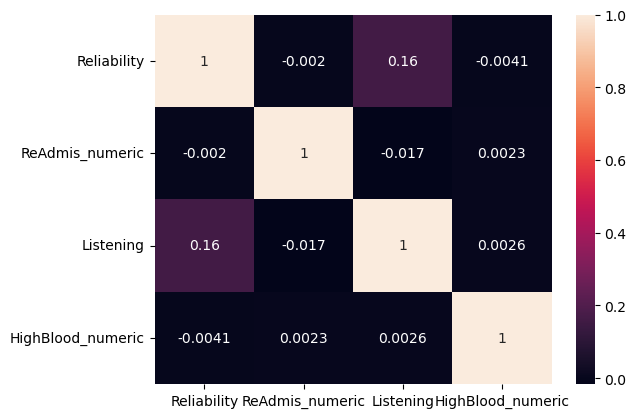

In [33]:
bivariate = df[['Reliability', 'ReAdmis_numeric','Listening','HighBlood_numeric']]
sns.heatmap(bivariate.corr(), annot=True)
plt.show()

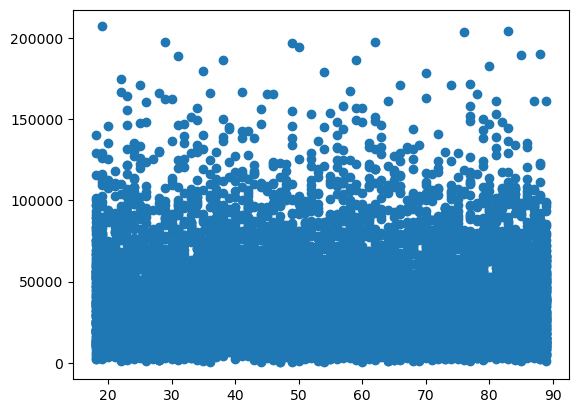

In [34]:
plt.scatter(df['Age'], df['Income'])
plt.show()

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


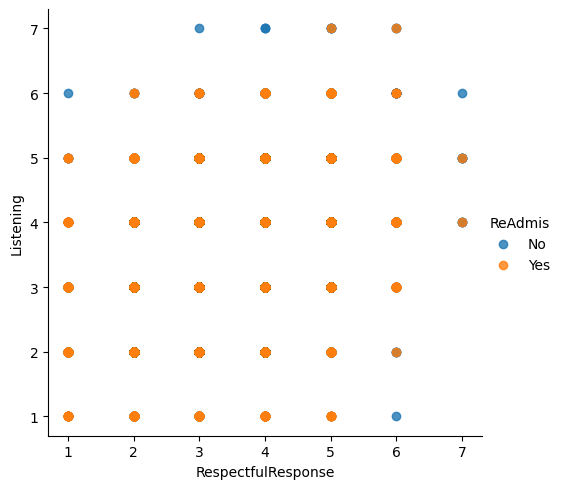

In [35]:
sns.lmplot(x = 'RespectfulResponse', y = 'Listening', data = df,
        
hue='ReAdmis', fit_reg=False)

<Axes: >

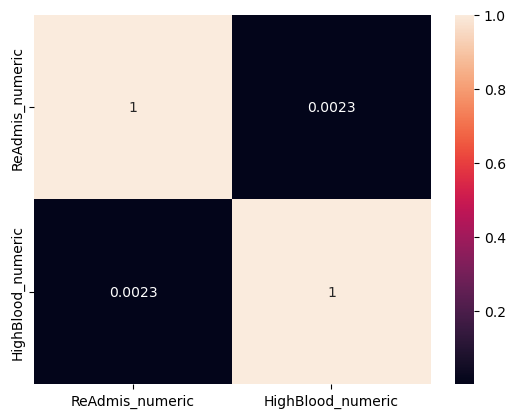

In [36]:
data_one=df[['ReAdmis_numeric', 'HighBlood_numeric']]
sns.heatmap(data_one.corr(),annot=True )

In [37]:
alpha=0.05
def chi_test(col_1, col_2):
    cont= pd. crosstab (col_1, col_2, margins=False)
    print(cont)
    c, p, dof, expected = chi2_contingency(cont)
    print('p-value = %.2f' %(p))
    print('dof value= %d' % (dof))
    print('expected= %s' %(expected))
    
    if p <= alpha:print('Reject the null hypothesis, the two variables are dependent')
    else:print('Two variables are independent')

In [38]:
alpha=0.05
def chi_test(col_1, col_2):
    cont= pd. crosstab (col_1, col_2, margins=False)
    print(cont)
    stat, p, dof, expected = chi2_contingency(cont)
    print('p-value = %.2f' %(p))
    print('dof value= %d' % (dof))
    print('The ChiSquare statistic is: ' +str(stat))
    
    if p <= alpha:print('Reject the null hypothesis, the two variables are dependent')
    else:print('Two variables are independent')

In [39]:
result=chi_test(df['ReAdmis_numeric'], df['Listening'])
print(result)

Listening          1    2     3     4    5    6   7
ReAdmis_numeric                                    
0                130  863  2154  2109  910  155  10
1                 79  528  1247  1228  519   66   2
p-value = 0.26
dof value= 6
The ChiSquare statistic is: 7.680675838248573
Two variables are independent
None


In [40]:
result=chi_test(df['ReAdmis_numeric'], df['HighBlood_numeric'])
print(result)

HighBlood_numeric     0     1
ReAdmis_numeric              
0                  3747  2584
1                  2163  1506
p-value = 0.84
dof value= 1
The ChiSquare statistic is: 0.04239657973011679
Two variables are independent
None


In [41]:
result=chi_test(df['ReAdmis_numeric'], df['RespectfulResponse'])
print(result)

RespectfulResponse    1    2     3     4    5    6  7
ReAdmis_numeric                                      
0                   130  829  2120  2192  899  153  8
1                    83  490  1251  1272  504   67  2
p-value = 0.41
dof value= 6
The ChiSquare statistic is: 6.090463952746655
Two variables are independent
None
